In [1]:
import os
#from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, optimizers, utils

Using TensorFlow backend.


In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#binary_flder = '/content/drive/Shared drives/DS8013/Data/Binary/'
binary_flder = 'F:/MSc_Data Science/DS 8013 Deep learning/Project/Dataset/Binary/Binary/'

In [3]:
X = np.load(binary_flder + 'X.npy')
y = np.load(binary_flder + 'y.npy')
y_onehot = np.load(binary_flder + 'y_onehot.npy')

In [4]:
X.shape

(27000, 64, 64, 3)

In [5]:
y.shape

(27000,)

In [6]:
y_onehot.shape

(27000, 10)

In [7]:
# split data set into test and training using 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X,y_onehot,test_size = 0.2, random_state = 197)

In [8]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (21600, 64, 64, 3)
X_test: (5400, 64, 64, 3)
y_train: (21600, 10)
y_test: (5400, 10)


In [9]:
# reshape to be [samples][width][height][channels]
x_train = X_train.reshape((X_train.shape[0], 64, 64, 3)).astype('float32')
x_test = X_test.reshape((X_test.shape[0], 64, 64, 3)).astype('float32')

# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [10]:
image_shape = x_train.shape[1:]
image_shape

(64, 64, 3)

In [11]:
#import libraries
import keras
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.optimizers import SGD
from keras.optimizers import Adam,RMSprop

In [12]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape = image_shape)

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 12s 0us/step


In [13]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [14]:
for layer in base_model.layers:
    layer.trainable = False

In [15]:
CLASSES = 10
#Adding custom Layers 
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(256, activation="relu")(x)
predictions = Dense(CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [17]:
# Compile model
# opt = RMSprop(lr=0.0001)
opt1 = SGD(lr=0.1, momentum=0.9)
opt2 = SGD(lr=0.01, momentum=0.9)
opt3 = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt2, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                                     epochs=10, batch_size=32, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 21600 samples, validate on 5400 samples
Epoch 1/10
 - 1727s - loss: 0.9083 - acc: 0.6670 - val_loss: 0.7305 - val_acc: 0.7470
Epoch 2/10
 - 1999s - loss: 0.6716 - acc: 0.7625 - val_loss: 0.6835 - val_acc: 0.7663
Epoch 3/10


KeyboardInterrupt: 

In [0]:
# Evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Loss: ', scores[0],'\nAccuracy: ', scores[1]*100)

5400/5400 [==============================] - 4s 697us/step
Loss:  0.49378590080473156 
Accuracy:  83.31481218338013


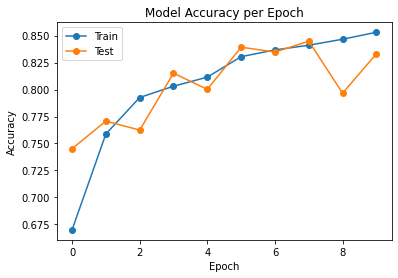

In [0]:
# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'],marker = 'o')
plt.plot(hist.history['val_accuracy'], marker = 'o')
plt.title('Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [ ]:
plt.plot(hist.history['loss'],marker = 'o')
plt.plot(hist.history['val_loss'], marker = 'o')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()